# Exploración de datos

* Introducción
* Carga de modulos y datos
* Transformación de datos
* Eliminar Outliers
* Análisis exploratorio de datos


## Introducción

El objetivo del análisis exploratorio es resumir y visualizar datos de manera que se facilite la identificación de tendencias o patrones que son relevantes para responder alguna pregunta de interés.

En la exploración de datos las técnicas a usar dependen del tipo de variable, el cual está íntimamente asociado a la escala de medición (Escala Nominal, Escala Ordinal). Para variables cuantitativas se usan medidas resumen tales como medias, desviación estándar, mínimos y máximos e histogramas y gráficos de barras, mientras que para variables cualitativas o categorizadas se usan  porcentajes  y gráficos de sectores y de barras apiladas.

## Carga de módulos y datos

In [1]:
import nltk
import unicodedata
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from nltk.corpus import stopwords
from statsmodels.distributions.empirical_distribution import ECDF
import os

In [2]:
#nltk.download('stopwords')
stop = stopwords.words('spanish')

In [3]:
os.chdir('C:/Users/stiven.lopez/Documents/Dataton/')
os.getcwd()

'C:\\Users\\stiven.lopez\\Documents\\Dataton'

In [4]:
lista = ["id_trn_ach","id_cliente","fecha","hora","valor_trx","ref1","ref2","ref3","sector","subsector","descripcion","11","12","13"]
datos = pd.read_csv('datos.csv', sep=',', names=lista, header= None, parse_dates=[['fecha', 'hora']])
datos.head()

C:\Users\stiven.lopez\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,fecha_hora,id_trn_ach,id_cliente,valor_trx,ref1,ref2,ref3,sector,subsector,descripcion,11,12,13
0,20161207 113451,230435642,3,2122392.51,CC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20161016 3424,222356110,10,148438.37,Referencia: Contrato: Valor:,CC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20180120 195042,309137749,10,94025.19,CC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20180326 192146,324614737,10,94430.07,CC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20170106 201317,235344690,18,670645.57,MEDICINA PREPAGADA COLSANITAS,CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
datos = datos.drop(datos.columns[[5, 6, 10, 11, 12]], axis=1)
datos.head()

,fecha_hora,id_trn_ach,id_cliente,valor_trx,ref1,sector,subsector,descripcion
0,20161207 113451,230435642,3,2122392.51,CC,NaN,NaN,NaN
1,20161016 3424,222356110,10,148438.37,Referencia: Contrato: Valor:,NaN,NaN,NaN
2,20180120 195042,309137749,10,94025.19,CC,NaN,NaN,NaN
3,20180326 192146,324614737,10,94430.07,CC,NaN,NaN,NaN
4,20170106 201317,235344690,18,670645.57,MEDICINA PREPAGADA COLSANITAS,NaN,NaN,NaN


In [6]:
datos.isnull().sum()

fecha_hora           0
id_trn_ach           0
id_cliente           0
valor_trx            0
ref1            360483
sector         8519175
subsector      8519175
descripcion    8519175
dtype: int64

In [7]:
datos.notnull().sum()

fecha_hora     11816281
id_trn_ach     11816281
id_cliente     11816281
valor_trx      11816281
ref1           11455798
sector          3297106
subsector       3297106
descripcion     3297106
dtype: int64

## Transformación de datos

In [8]:
datos['ref1'] = datos['ref1'].astype('str')
datos['descripcion'] = datos['descripcion'].astype('str')

In [9]:
datos['ref1'] = datos['ref1'].str.replace('+',' ').str.replace('_',' ')
datos['descripcion'] = datos['descripcion'].str.replace('+',' ').str.replace('_',' ')

In [10]:
def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    #nfkd_form = unicodedata.normalize("NFKD", muestra['ref1']).encode("ascii","ignore").decode("ascii")
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    return only_ascii.decode('utf-8')

datos['ref1'] = datos['ref1'].apply(remove_accents)
datos['descripcion'] = datos['descripcion'].apply(remove_accents)

In [11]:
datos['ref1'] =  datos['ref1'].str.replace(r"[^a-zA-Z0-9 ]+", "").str.strip()
datos['descripcion'] =  datos['descripcion'].str.replace(r"[^a-zA-Z0-9 ]+", "").str.strip()

In [12]:
datos['ref1'] = datos['ref1'].str.lower()

datos['sector'] = datos['sector'].str.lower()
datos['subsector'] = datos['subsector'].str.lower()
datos['descripcion'] = datos['descripcion'].str.lower()

In [13]:
datos['ref1'] = datos['ref1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
datos['descripcion'] = datos['descripcion'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [14]:
datos.head(10)

,fecha_hora,id_trn_ach,id_cliente,valor_trx,ref1,sector,subsector,descripcion
0,20161207 113451,230435642,3,2122392.51,cc,NaN,NaN,nan
1,20161016 3424,222356110,10,148438.37,referencia contrato valor,NaN,NaN,nan
2,20180120 195042,309137749,10,94025.19,cc,NaN,NaN,nan
3,20180326 192146,324614737,10,94430.07,cc,NaN,NaN,nan
4,20170106 201317,235344690,18,670645.57,medicina prepagada colsanitas,NaN,NaN,nan
5,20180307 143513,320049316,18,706933.70,recaudo colsanitas,NaN,NaN,nan
6,20161207 155840,230519178,19,306773.79,cc,NaN,NaN,nan
7,20170210 142809,241307506,19,701067.98,pago planilla cesantias,servicios financieros,otros servicios financieros,actividades auxiliares actividades servicios f...
8,20180220 153148,316193109,24,767571.01,cc,NaN,NaN,nan
9,20170914 70026,282076350,26,100277.45,pago factura conjunto residencial pietra santa ph,NaN,NaN,nan


## Eliminar Outliers

Se procede a eliminar los outliers, para esto se usa métodos estadísticos clásicos donde nos podamos quedar con el mayor porcentaje de datos y se eliminen algunas transacciones exageradamante altas, estos métodos son:
* media +- 2*Rango intercuantilico
* media +- 3*Rango intercuantilico
* media +- 2*Desviación estandar
* media +- 3*Desviación estandar
* Tukey fences

In [15]:
iqr = datos["valor_trx"].quantile(0.75)-datos["valor_trx"].quantile(0.25)

In [16]:
r_2 = datos['valor_trx'].mean() + 2*iqr
r_3 = datos['valor_trx'].mean() + 3*iqr
d_2 = datos['valor_trx'].mean() + 2*datos['valor_trx'].std()
d_3 = datos['valor_trx'].mean() + 3*datos['valor_trx'].std()
q = datos["valor_trx"].quantile(0.75) + 1.5*iqr

In [17]:
print(r_2, r_3, d_2, d_3, q)

866436.8784466728 1116166.478446673 3560694.6948177884 5157553.203003346 676354.6399999999


In [18]:
df = datos[(datos['valor_trx'] > 1600) & (datos['valor_trx'] < r_2)]
df1 = datos[(datos['valor_trx'] > 1600) & (datos['valor_trx'] < r_3)]
df2 = datos[(datos['valor_trx'] > 1600) & (datos['valor_trx'] < d_2)]
datos = datos[(datos['valor_trx'] > 1600) & (datos['valor_trx'] < d_3)]
df4 = datos[(datos['valor_trx'] > 1600) & (datos['valor_trx'] < q)]

Se elige el método estadístico clásico: media +- 3*Desviación estandar debido a que elimina algunos outliers, y recoge aproximadamente el 98% del total de datos, además se elige como límite inferior valores de transacción mayores a 1600 pesos, debido a que ese es el monto mínimo en PSE por valor de transacción.

## Análisis exploratorio de datos

* Datos númericos
* Datos categoricos 
* Valores missing

### Datos númericos

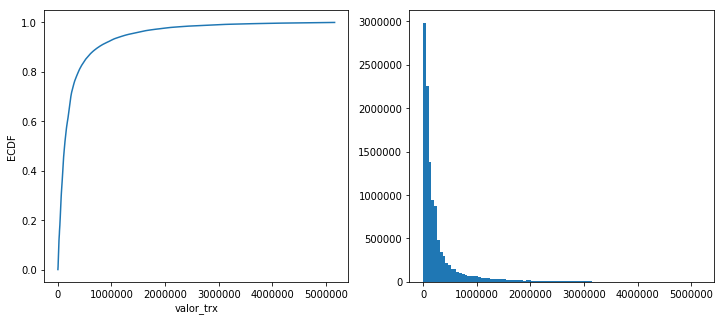

In [20]:
plt.figure(figsize = (12, 5)) 
# ECDF
plt.subplot(121)
cdf = ECDF(datos['valor_trx'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.xlabel('valor_trx'); plt.ylabel('ECDF');

# overall distribution
plt.subplot(122)
plt.hist(datos['valor_trx'].dropna(), bins=100);

In [21]:
datos['valor_trx'].describe()

count    1.171322e+07
mean     3.075681e+05
std      5.381459e+05
min      1.600030e+03
25%      5.211633e+04
50%      1.254969e+05
75%      2.966553e+05
max      5.157550e+06
Name: valor_trx, dtype: float64

El gráfico ECDF (Empirical Cumulative Density Function) y el histograma de la variable valor de transacción, nos muestra que al menos el 50% de los datos, realizan transacciones por valores de 125496 pesos aproximadamente. 

## Variables categoricas

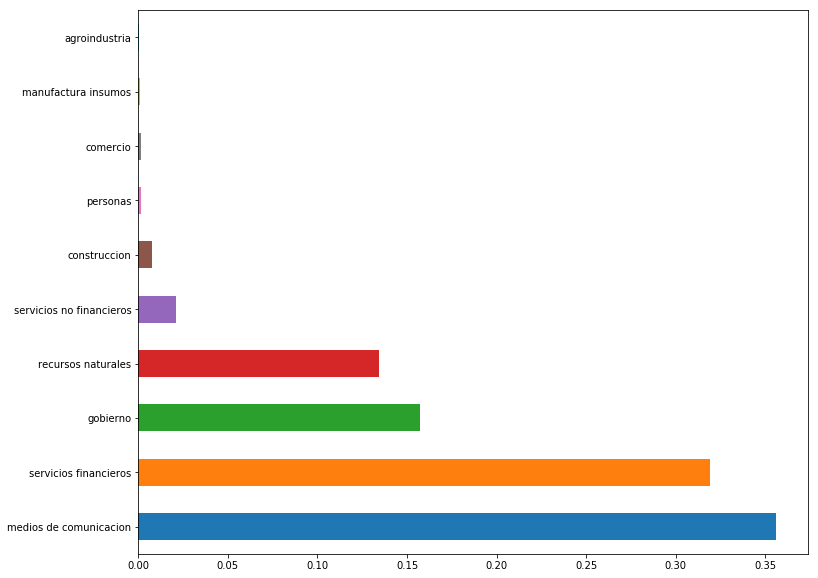

In [22]:
plt.figure(figsize=(12,10))
datos.sector.value_counts(True).plot.barh()

Al menos un poco más del 35% de los datos pertenecen al sector de medios de comunicación y un poco más del 30% pertenecen a servicios financieros.

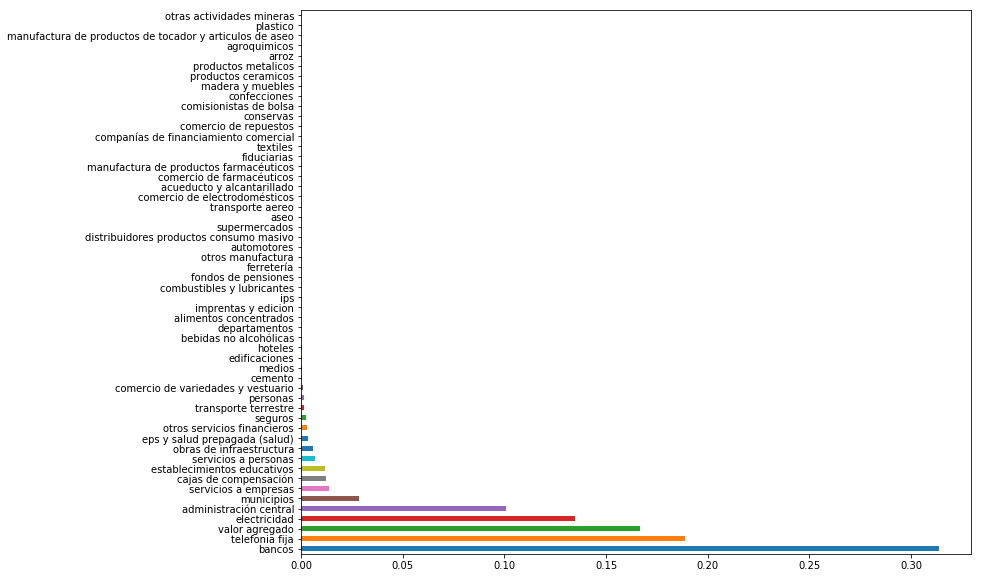

In [23]:
plt.figure(figsize=(12,10))
datos.subsector.value_counts(True).plot.barh()

Se puede observar que en el subsector, al menos un poco más del 30% de los datos pertenecen al subsector de bancos y coincide con lo observado en el código anterior, donde un poco más del 30% de los datos pertenecen al sector de servicios financieros.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

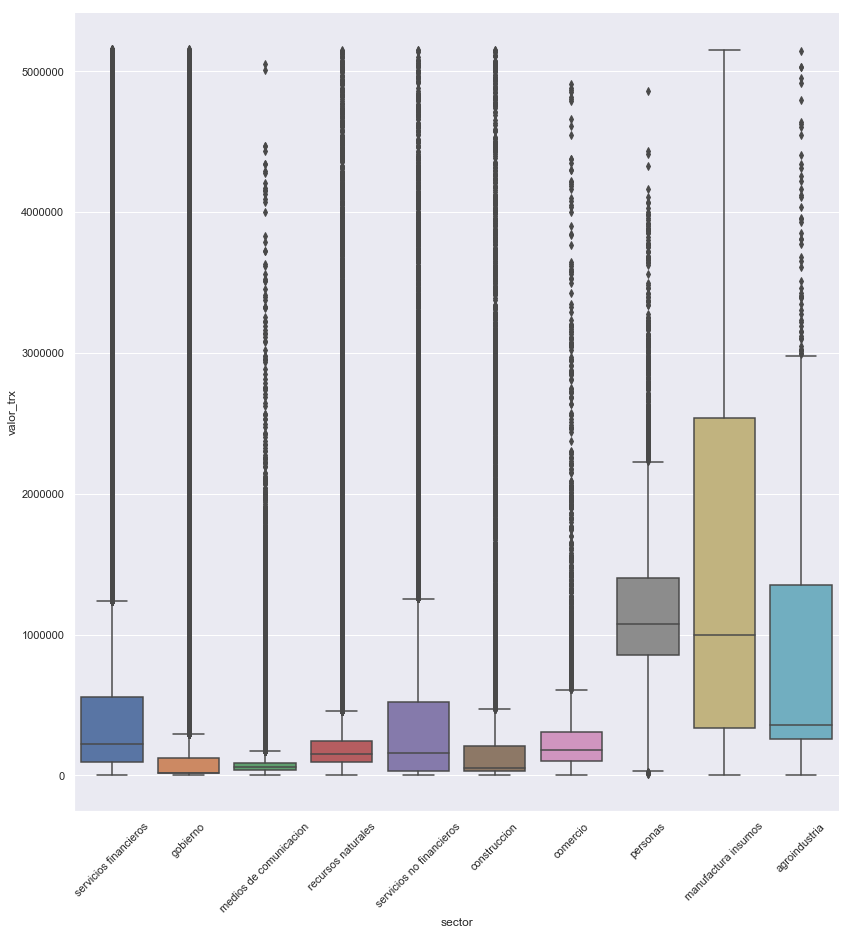

In [24]:
sns.set()
sns.catplot(x="sector", y="valor_trx", kind="box", data=datos, height=12)
plt.xticks(rotation=45)

El boxplot nos muestra que en general algunas categorias del sector no presentan mucha dispersión en en el valor de la transacción, sin embargo, muchas de estas categorias son sesgadas hacia la derecha, es decir muchas transacciones son por valores pequeños y pocas transacciones se hacen por valores grandes. Además se puede observar que la categoria de personas son las que hacen las transacciones más altas.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text xticklabel objects>)

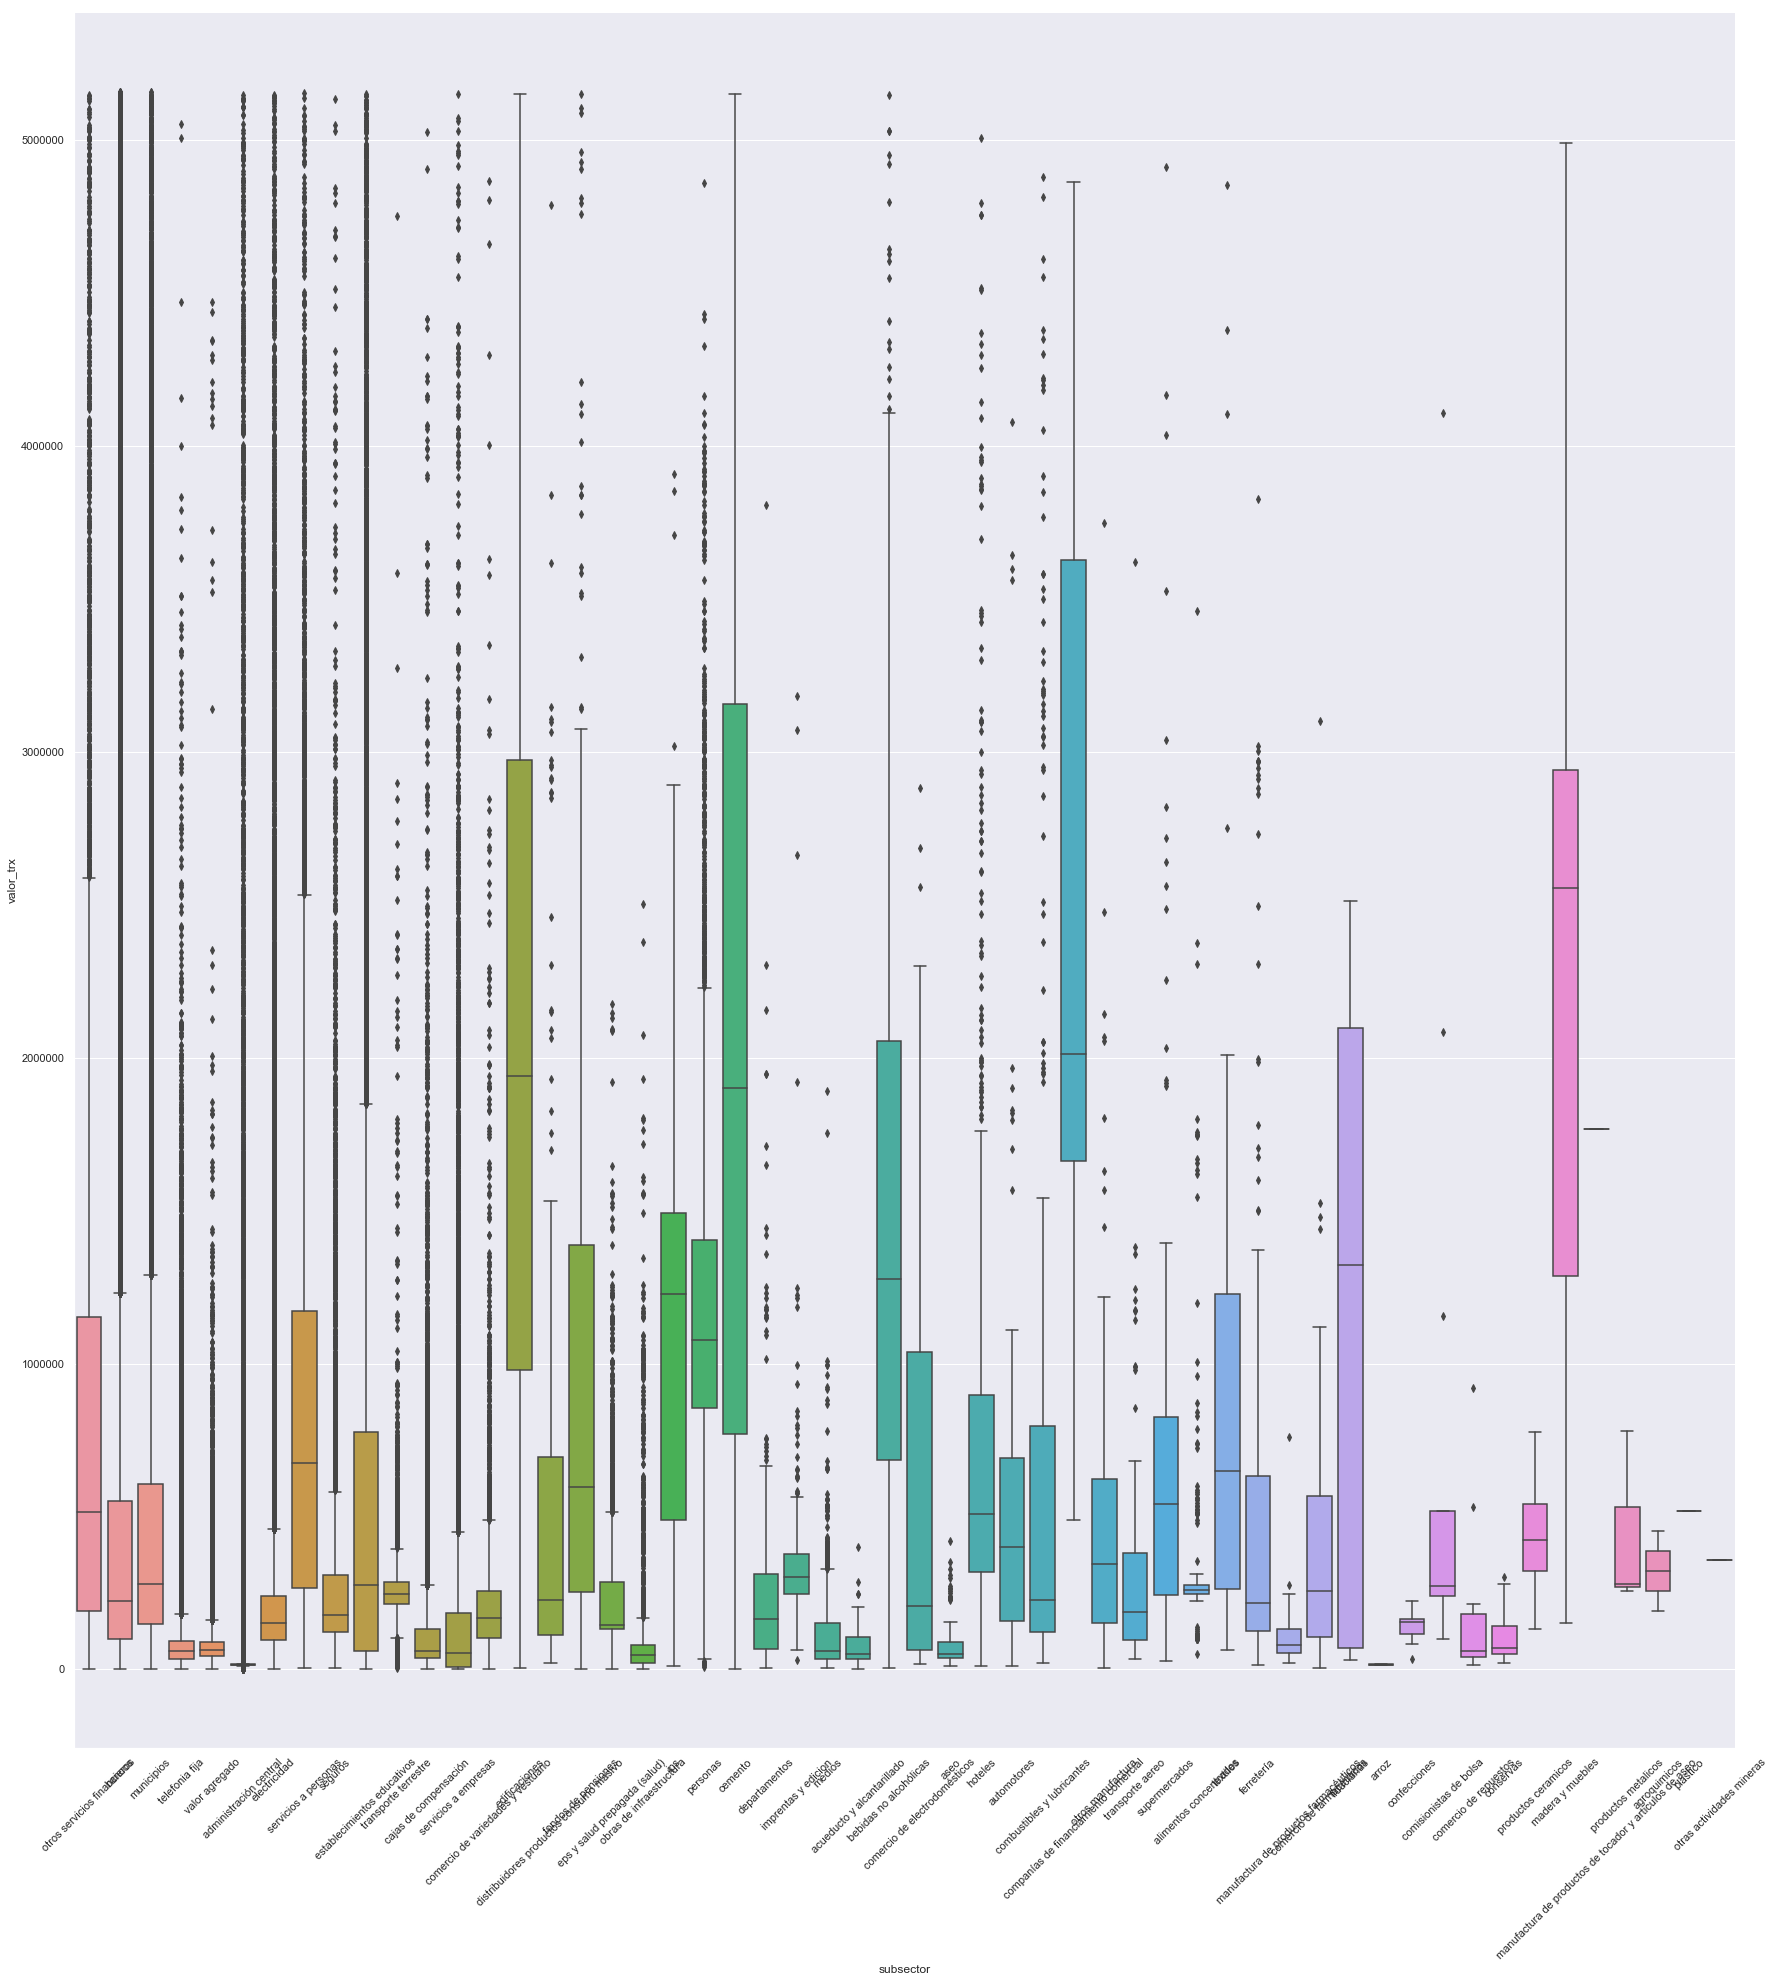

In [25]:
sns.catplot(x="subsector", y="valor_trx", kind="box", data=datos, height=25)
plt.xticks(rotation=45)

El boxplot nos muestra que en general las categorias de subsectores presentan mucha dispersión en las transacciones, es decir, algunos hacen transacciones por poco valor y otros por valores más altos. 

## Valores missing

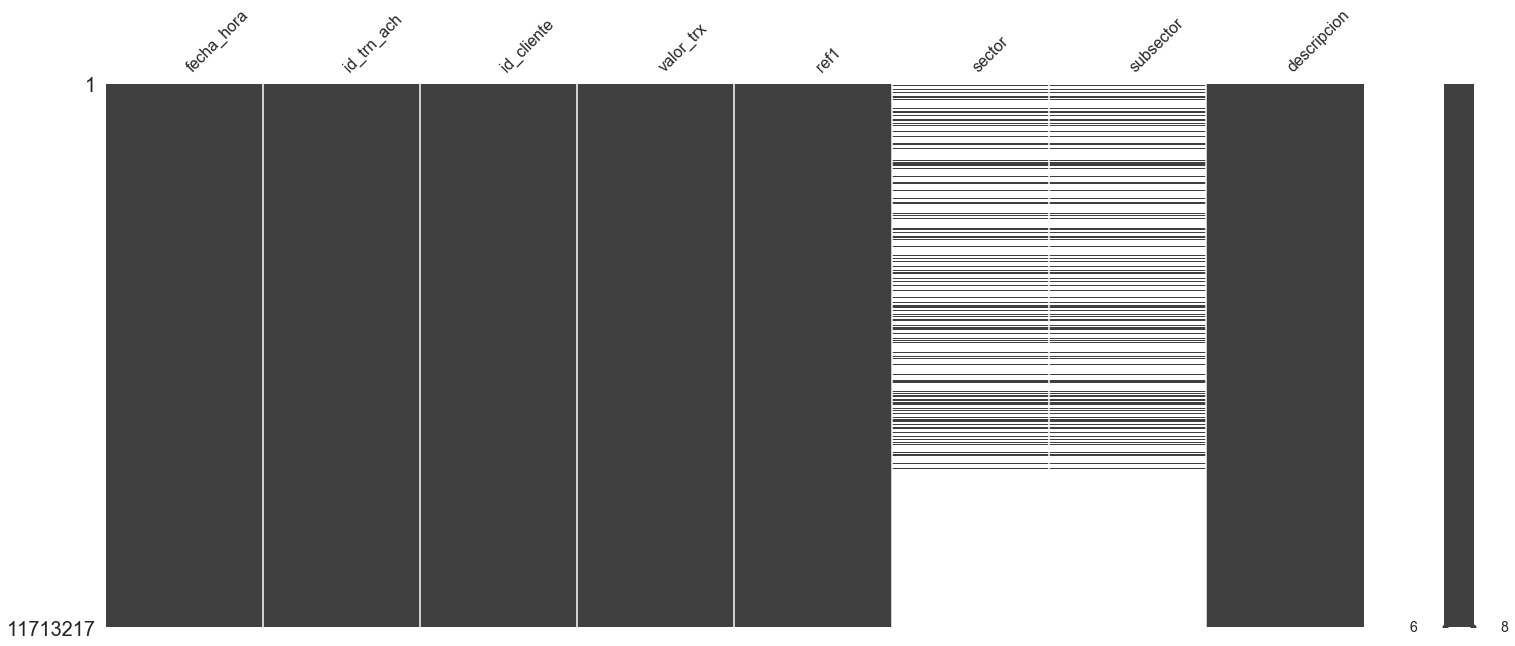

In [26]:
msno.matrix(datos)

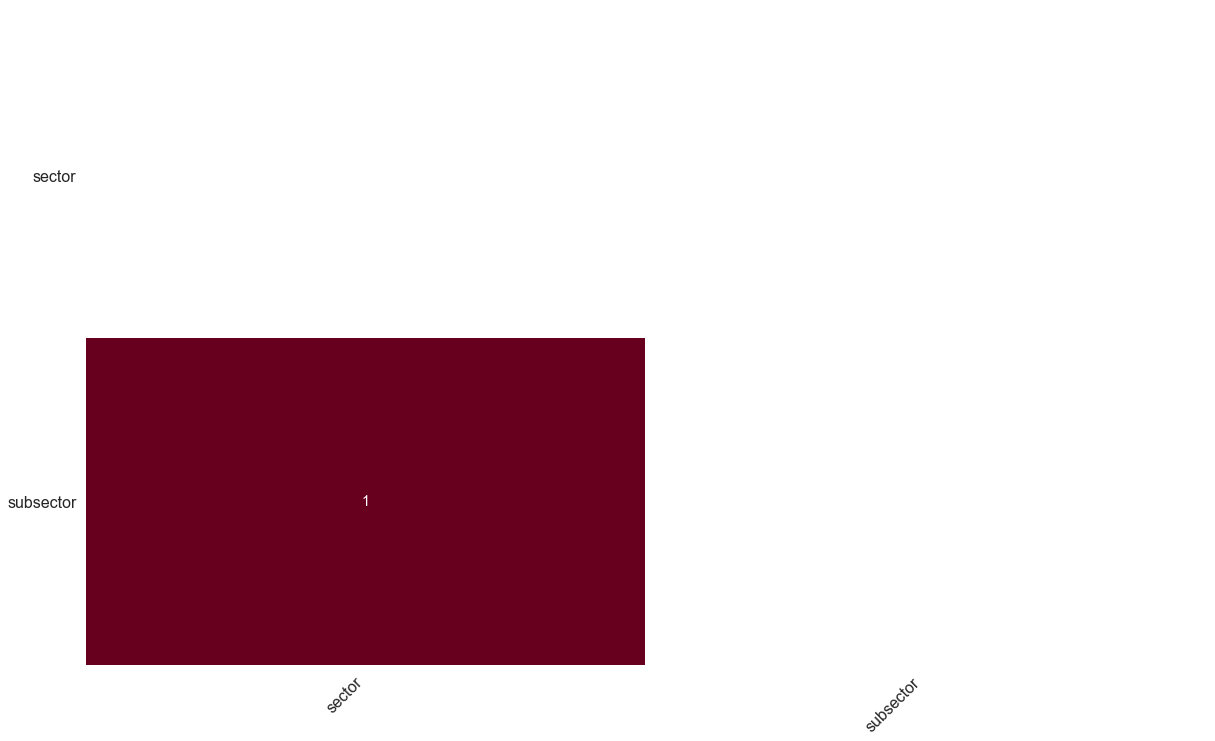

In [27]:
msno.heatmap(datos)

Los anteriores gráficos muestran que hay una correlación perfecta de valores missing entre sector y subsector, es decir, cuando falta el sector siempre va a faltar el campo subsector.